# WeatherPy

---

### What is the weather like as we approach the equator?

In [48]:
# Dependencies and Setup (provided in starter code)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key (provided in starter code)
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude (provided in starter code)
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations (provided in starter code)
lat_lngs = []

# Empty list for holding the cities names (provided in starter code)
cities = []

# Range of latitudes and longitudes (provided in starter code)
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations (provided in starter code)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination (provided in starter code)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list (provided in starter code)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (provided in starter code)
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kindu
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | ayod
City not found. Skipping...
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | kupang
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | yulinshi
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | cogealac
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | ardakan
Processing Record 13 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | jiwani
Processing Record 19 of Set 1 | tsiolkovskiy
City not found. Skipping...
Processing Record 20 of Set 1 | thompson
Processing Record 21

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [44]:
# Display sample data (provided in the starter code)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.11,88,87,14.84,TF,1737658125
1,kindu,-2.9500,25.9500,21.46,99,100,1.68,CD,1737658126
2,port lincoln,-34.7333,135.8667,15.61,78,0,3.08,AU,1737658127
3,waitangi,-43.9535,-176.5597,16.57,99,99,2.74,NZ,1737658129
4,kupang,-10.1667,123.5833,26.32,100,100,0.51,ID,1737658130


In [45]:
# Export the City_Data into a csv (provided in the starter code)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data (provided in the starter code)
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data (provided in the starter code)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.11,88,87,14.84,TF,1737658125
1,kindu,-2.9500,25.9500,21.46,99,100,1.68,CD,1737658126
2,port lincoln,-34.7333,135.8667,15.61,78,0,3.08,AU,1737658127
3,waitangi,-43.9535,-176.5597,16.57,99,99,2.74,NZ,1737658129
4,kupang,-10.1667,123.5833,26.32,100,100,0.51,ID,1737658130


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

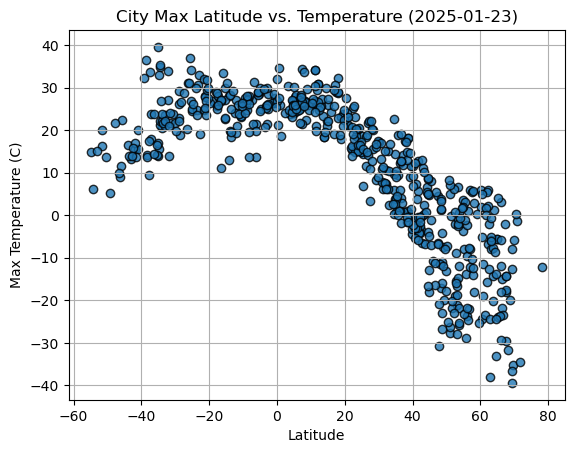

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2025-01-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

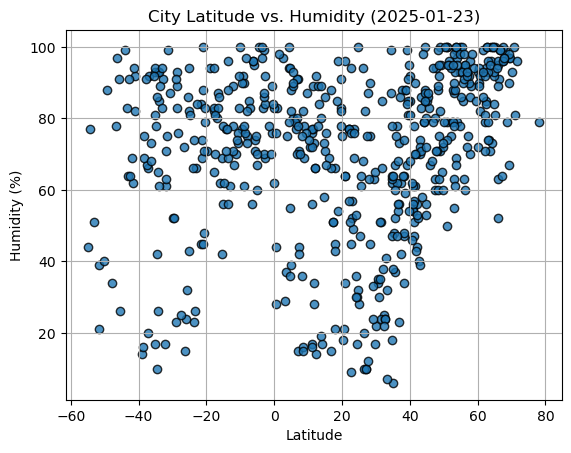

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-01-23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

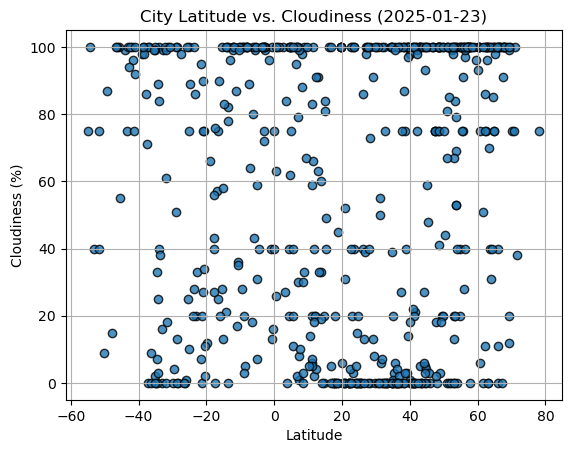

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-01-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

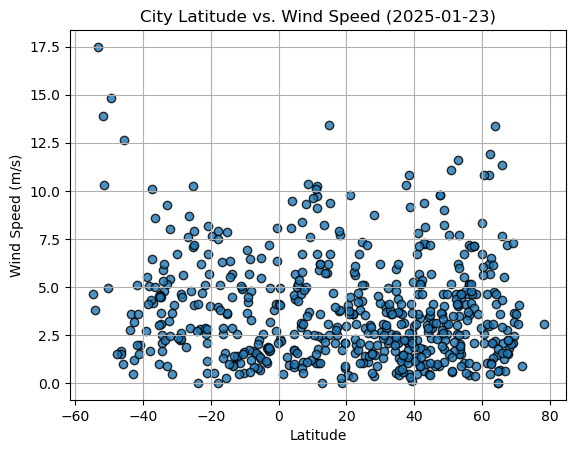

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-01-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [64]:
# Define a function to create Linear Regression plots
def weather_linear_regression(x_values, y_values, x_label, y_label, title, eq_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r^2-value is: {rvalue**2}")
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, eq_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)



In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,bethel,41.3712,-73.4140,-1.10,51,0,5.66,US,1737658131
6,yulinshi,38.2906,109.7494,1.07,47,100,2.09,CN,1737658133
7,st. john's,47.5649,-52.7093,-6.51,60,75,9.77,CA,1737658134
8,cogealac,44.5500,28.5667,5.02,85,5,1.70,RO,1737658135
9,stanley,54.8680,-1.6985,3.62,93,20,2.57,GB,1737658136


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.11,88,87,14.84,TF,1737658125
1,kindu,-2.9500,25.9500,21.46,99,100,1.68,CD,1737658126
2,port lincoln,-34.7333,135.8667,15.61,78,0,3.08,AU,1737658127
3,waitangi,-43.9535,-176.5597,16.57,99,99,2.74,NZ,1737658129
4,kupang,-10.1667,123.5833,26.32,100,100,0.51,ID,1737658130


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7390641607907535


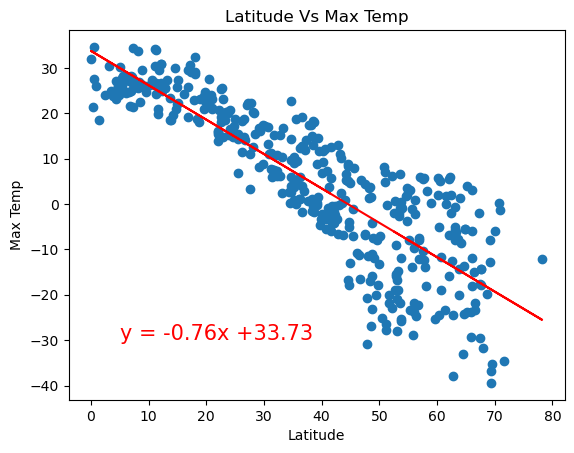

In [63]:
# Linear regression on Northern Hemisphere
# For this, I used the weather_linear_regression function I defined earlier. 
weather_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    "Latitude Vs Max Temp",
    (5,-30)   
)

The r^2-value is: 0.1970585675600439


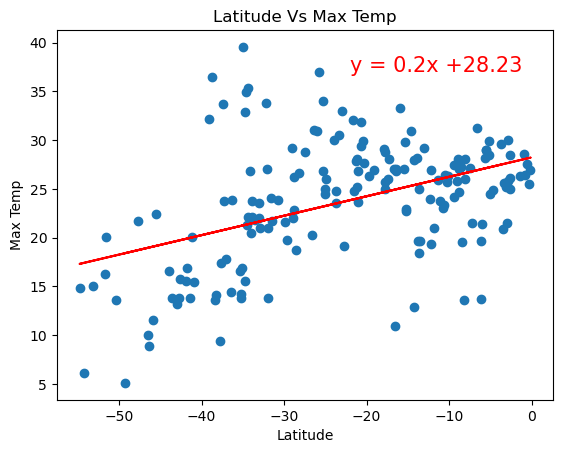

In [69]:
# Linear regression on Southern Hemisphere
# This follows the same procedure as above, but on the southern_hemi_df.
weather_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    "Latitude Vs Max Temp",
    (-22,37)   
)

**Discussion about the linear relationship:**

* In the plot that depicts the northern hemisphere, a negative trend can be seen; as the latitude increased, the maximum temprature decreased. The regression line also models the trend in the data. The r^2 value, which is -0.739, indicates that about 73.9% of the variance in the temperature is explained by the latitude. The intercept, which is the value of Y when X=0, is 33.73; this signifies that when the value of x is 0, this model predicts that the maximum temprature to be 33.73 C. To circle back to the question we started this project with, as we approach the equator from the north, the temprature is warmer. This findings align with the general understanding of how latitude influences climate in the northern hemisphere. 

* The southern hemisphere plot, on the other hand, shows a positive trend in which the temperature slightly increases as the latitude approaches the equator. The maximum temprature predicted as per this model is around 28.23 C when the value of x is 0 - which is the equator. Unlike in the northern hemisphere, the r-squared value indicates that only 19.7% of the variance in the max temp can be explained by latitude. This indicates that latitude alone is not a sufficient predictor of temprature in the southern hemisphere.  


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.17301369510387263


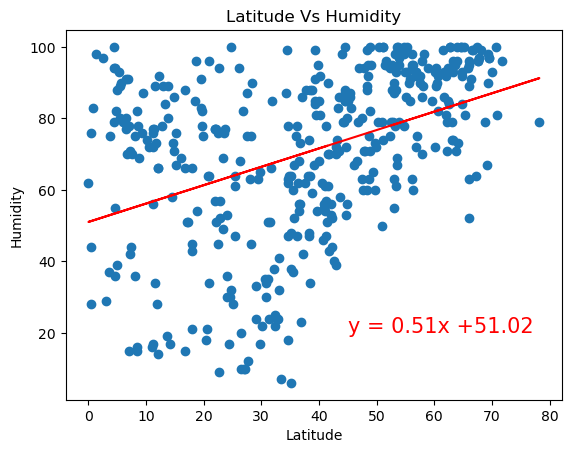

In [72]:
# Northern Hemisphere
# I followed the same rocedures as the preceeding two plots by changing the y values. 
weather_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    "Latitude Vs Humidity",
    (45,20)   
)

The r^2-value is: 0.08320733312876806


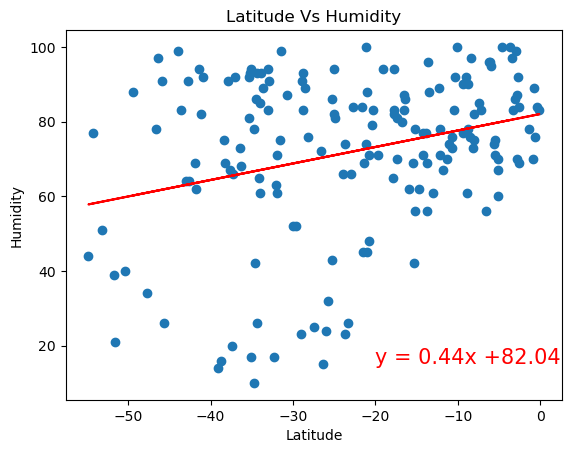

In [74]:
# Southern Hemisphere
# Used the weather_linear_regression function as above on the southern hemisphere dataframe. 
weather_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    "Latitude Vs Humidity",
    (-20,15)   
)

**Discussion about the linear relationship:**

* The plot showing the relationship between latittude and humidity in the northern hemisphere shows a slight positive trend in that as the latitude increased the humidity also slightly increased. However, according to the r-sqauared value indicates that only 17.3% of the variance in humidity can be explained by latitude. This suggests that in the northern hemisphere, other factors may be present that affect humidity on top of latitude. 

* In the southern hemisphere plot as well, there seems to be a weak corelation between latitude and humidity. As seen in the r-squared value, only 8.3% of variation in humidity is accounted for latitude as a factor. Similar to the northern hemisphere data, other factors may contribute more significantly to humidity variation than latitude alone. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06281135761803604


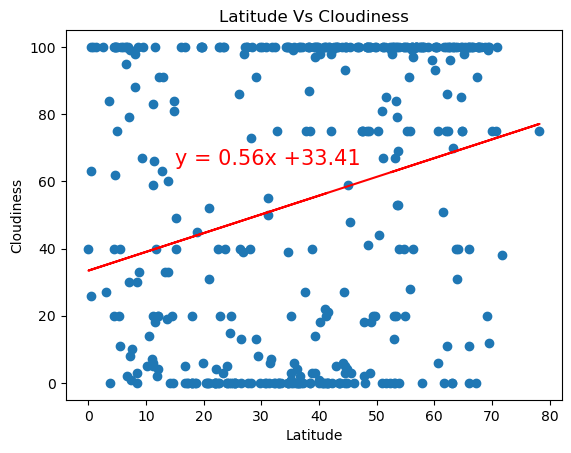

In [76]:
# Northern Hemisphere
# I called on the function here as well with the proper DataFrame and column. 
weather_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    "Latitude Vs Cloudiness",
    (15,65)   
)

The r^2-value is: 0.002762258529254332


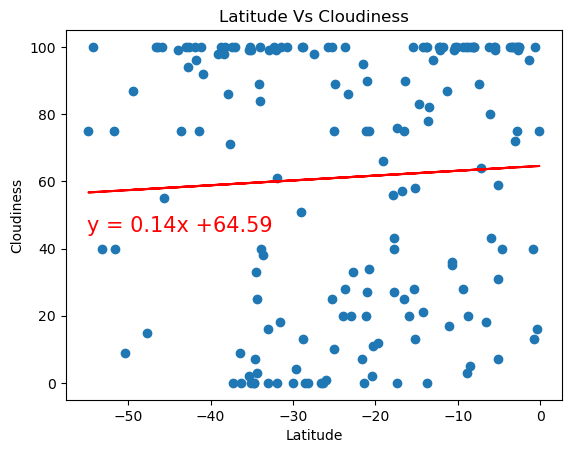

In [79]:
# Southern Hemisphere
# Changed the DataFrame for this one. 
weather_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    "Latitude Vs Cloudiness",
    (-55,45)   
)

**Discussion about the linear relationship:**
* Northern Hemisphere: there is a very weak positive corelation beween cloudiness and latitude in this plot. Also, only 6.3% of the variability in cloudiness is explained by latitude in this particular dataset. The scatterplot also shows variability at all latitudes signifying the weak correlation between latitude and cloudiness. 

* Southern Hemishere: the r-squared value in this dataset is 0.0027, which shows that there is almost no correlation between latitude and cloudiness. Also, the latutude explains only 0.27% of the variation in cloudiness. Also, there is no pattern seen in how the sctters are plotted. With this dataset in consideration, there is no significant relationship between cloudiness and latitude in the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0007418451464354907


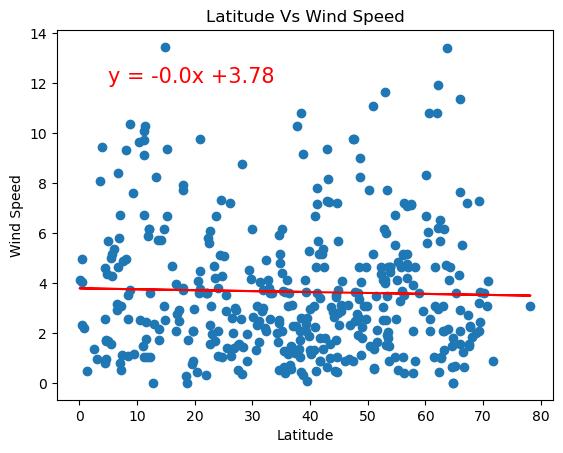

In [ ]:
# Northern Hemisphere
# Same procedure as above. 
weather_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    "Latitude Vs Wind Speed",
    (5,12)   
)

The r^2-value is: 0.08088002896231541


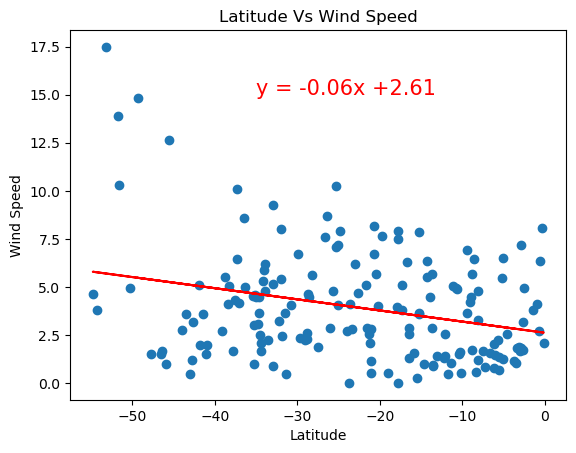

In [83]:
# Southern Hemisphere
# Same procedure as above. 
weather_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    "Latitude Vs Wind Speed",
    (-35,15)   
)

**Discussion about the linear relationship:**
* Northern Hemisphere: There is no clear pattern that can be seen in the scatterplot. The r-squared value of 0.0007 indicates that there is an alomost nonexistent corelation between latitudes and wind speed in the norhern hemisphere represented by this dataset. 

* Southern Hemisphere: There is a less than 1% corelation between latitude and wind speed in the southern hemisphere dataset as well. As the latitude gets closer to the equator, win speed decreased insignificantly. 

* For both datasets, it can be concluded that there is no meaningful corelation between latitude and wind speed. 